# Scraping data from real-estate webpage:

https://pythonhow.com/

Before you start scraping data from a website, it is mandatory to read website policies against the using or getting their data. For educational purposes, it should not be a problem.

## Loading the Source Code

The first thing you think about is, how you load the source code of the webpages. It is simple by importing library "requests" which will get you the desired webpage. It is good to store the content into a variable, which can be printed later on:

In [3]:
import requests
from bs4 import BeautifulSoup as bs

r = requests.get("https://www.century21.cz/nemovitosti?search%5Bttype%5D%5B0%5D=sale&search%5Bptype%5D=flat&search%5Boptions%5D%5Bflat%5D%5Bdisposition%5D%5B0%5D=2%2B1&search%5Boptions%5D%5Bflat%5D%5Bdisposition%5D%5B1%5D=2%2Bkk&search%5Boptions%5D%5Bflat%5D%5Bdisposition%5D%5B2%5D=3%2B1&search%5Boptions%5D%5Bflat%5D%5Bdisposition%5D%5B3%5D=3%2Bkk&search%5Bprice_to%5D=7500000&search%5Blocality%5D%5B0%5D=1")
c = r.content
c

b'<!DOCTYPE html>\n<html>\n\t<head>\n\t\t\t<!-- Google Tag Manager -->\n\t\t\t<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\t\t\tnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\t\t\tj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\t\t\t\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\t\t\t})(window,document,\'script\',\'dataLayer\',\'GTM-5HPPGHB\');</script>\n\t\t\t<!-- End Google Tag Manager\t-->\t\t\n\t\t\t\n\t\t\t<!-- Google Tag Manager -->\n\t\t\t<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\t\t\tnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\t\t\tj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\t\t\t\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\t\t\t})(window,document,\'script\',\'dataLayer\',\'GTM-NHJH79M\');</script>\n\t\t\t<!-- End Go

Now you can be sure, that you get the webpage content. However for human eye the data are not readable in this form. Lets use "BeautifulSoup" to parse html and then "prettify" the content:

In [4]:
soup = bs(c, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
			new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
			j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
			'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
			})(window,document,'script','dataLayer','GTM-5HPPGHB');
  </script>
  <!-- End Google Tag Manager	-->
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
			new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
			j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
			'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
			})(window,document,'script','dataLayer','GTM-NHJH79M');
  </script>
  <!-- End Google Tag Manager -->
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta co

## Extracting Divisions of All Properties

In the next step, inspect the webpage and go through all advertisement boxes. Locate divs and tags of each advertisement box and pick the data which you want to get. You are definitely interested in the price, the address, the title etc., later on you would like to scrap and save this data into a CSV or excel file with pandas.

But at first locat advertisement boxes divisions:

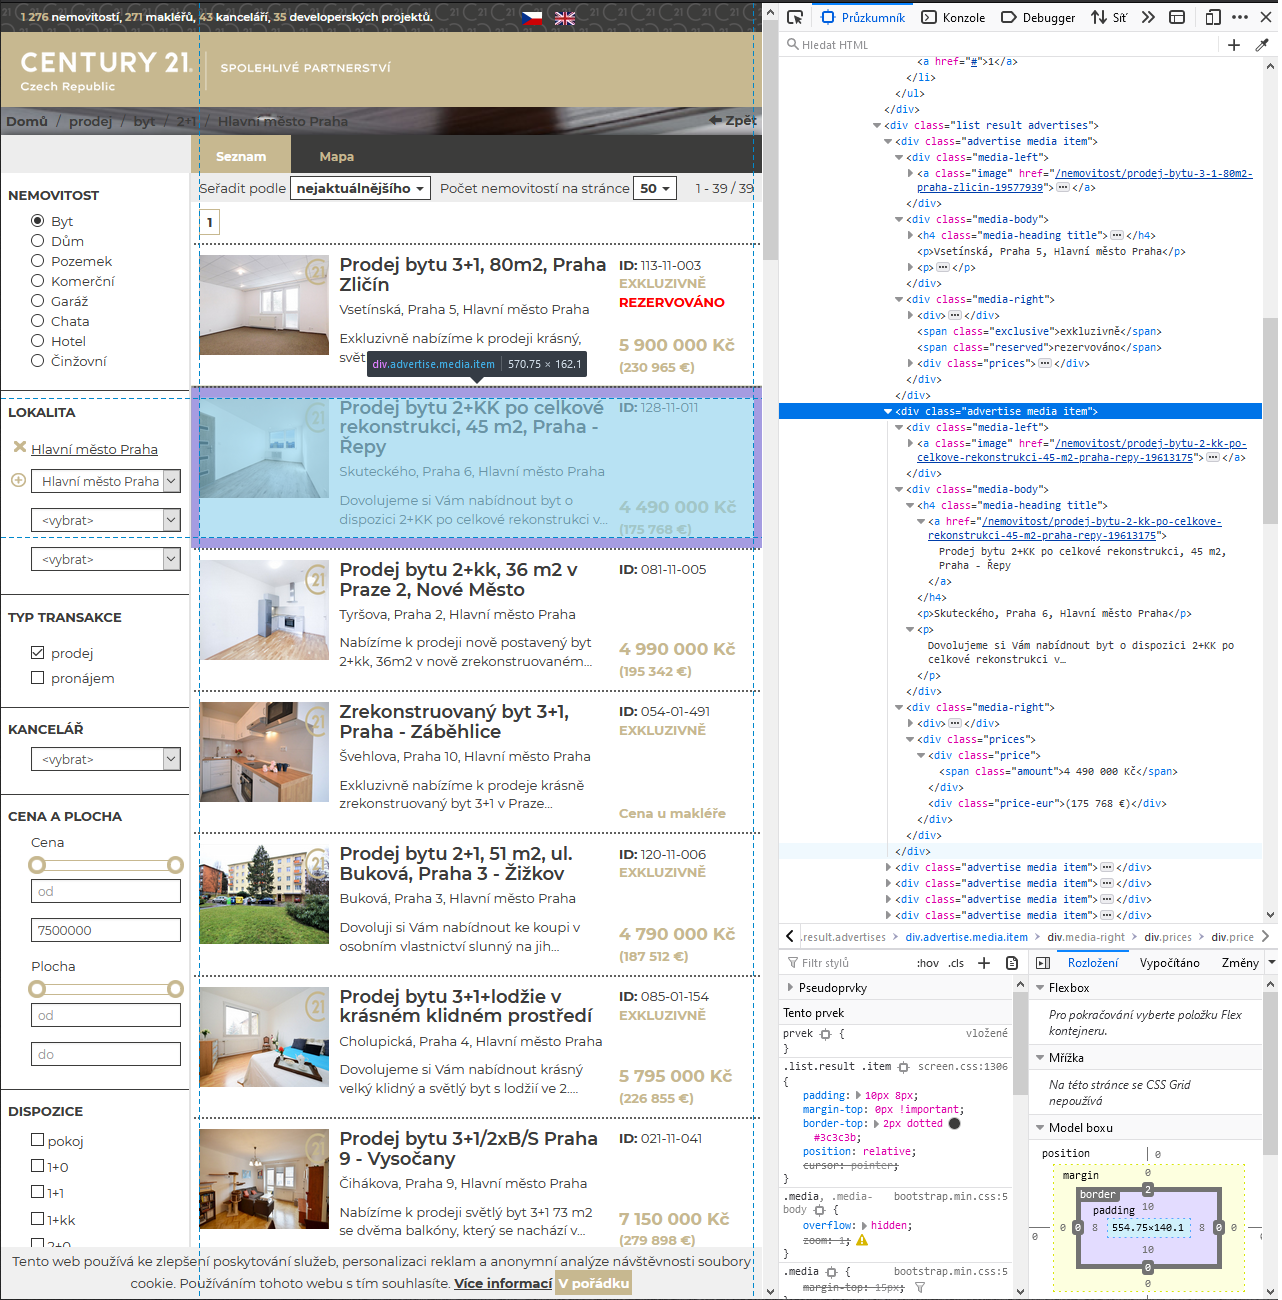

Let´s use the method find all, which applies to the soup object. It will generate a list with all the div elements that have a class of "advertise media item":

In [5]:
all = soup.find_all("div", {"class": "advertise media item"})

In [4]:
all

[<div class="advertise media item">
 <div class="media-left">
 <a class="image" href="/nemovitost/prodej-bytu-2kk-111-m2-praha-9-vysocany-19377763">
 <img alt="" class="media-object fill" src="/media/property/thumb/19377763/60352e831109c8.05998136.jpg"/>
 </a>
 </div>
 <div class="media-body">
 <h4 class="media-heading title">
 <a href="/nemovitost/prodej-bytu-2kk-111-m2-praha-9-vysocany-19377763">Prodej bytu 2kk 111 m2, Praha 9 - Vysočany</a>
 </h4>
 <p>Na Harfě, Praha 9, Hlavní město Praha</p>
 <p>Nabízíme k prodeji moderní a nadstandardně vybavený byt 2+kk 111 m2 s terasou,…</p>
 </div>
 <div class="media-right">
 <div>
 <span class="highlight-dark">ID:</span> 
 				021-01-260
 			</div>
 <div class="prices">
 <div class="price">
 <span class="amount">7 190 000 Kč</span>
 </div>
 <div class="price-eur">(281 464 €)</div>
 </div>
 </div>
 </div>,
 <div class="advertise media item">
 <div class="media-left">
 <a class="image" href="/nemovitost/prodej-bytu-3-1-2xb-s-praha-9-vysocany-195

If dont want to look through the data manually you can find the lenght of this all object, which like a list. It is not exactly a list. Actually it is a result set element:

In [5]:
type(all)

bs4.element.ResultSet

## Extracting Elements

We were able to divide (separate) each advertisement box. Not lets extract each data element. If we take a look on previous step and check the lenght of the scraped data so far, we get lenght of the results == 40, it means we scraped 40 advertisements in total:

In [6]:
len(all)

40

If we want to look for example for prices, it has span tags and amount class:

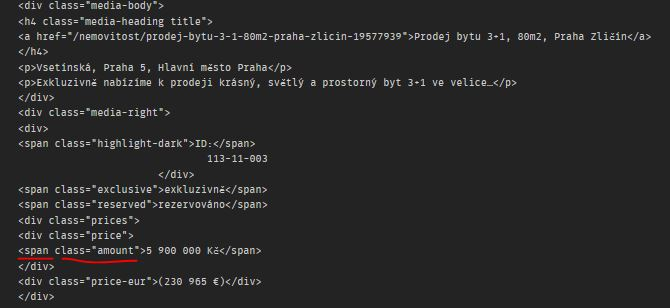

In [7]:
all[0].find_all("span", {"class": "amount"})

[<span class="amount">7 190 000 Kč</span>]

In this case, we can use find method, so that would give us not results at list, but the actual tag element:

In [8]:
all[0].find("span", {"class": "amount"})

<span class="amount">7 190 000 Kč</span>

That means we can now apply the text object and we get the string here: 

In [9]:
all[0].find("span", {"class": "amount"}).text

'7 190 000 Kč'

In [10]:
all[1].find("span", {"class": "amount"}).text

'7 150 000 Kč'

In [11]:
type(all[0].find("span", {"class": "amount"}).text)

str

In case, we would have some additional text or characters here, we could get rid of them like with the regular string manipulation. 

Now lets implement for loop to iterate through all prices and other data, which we want to extract:

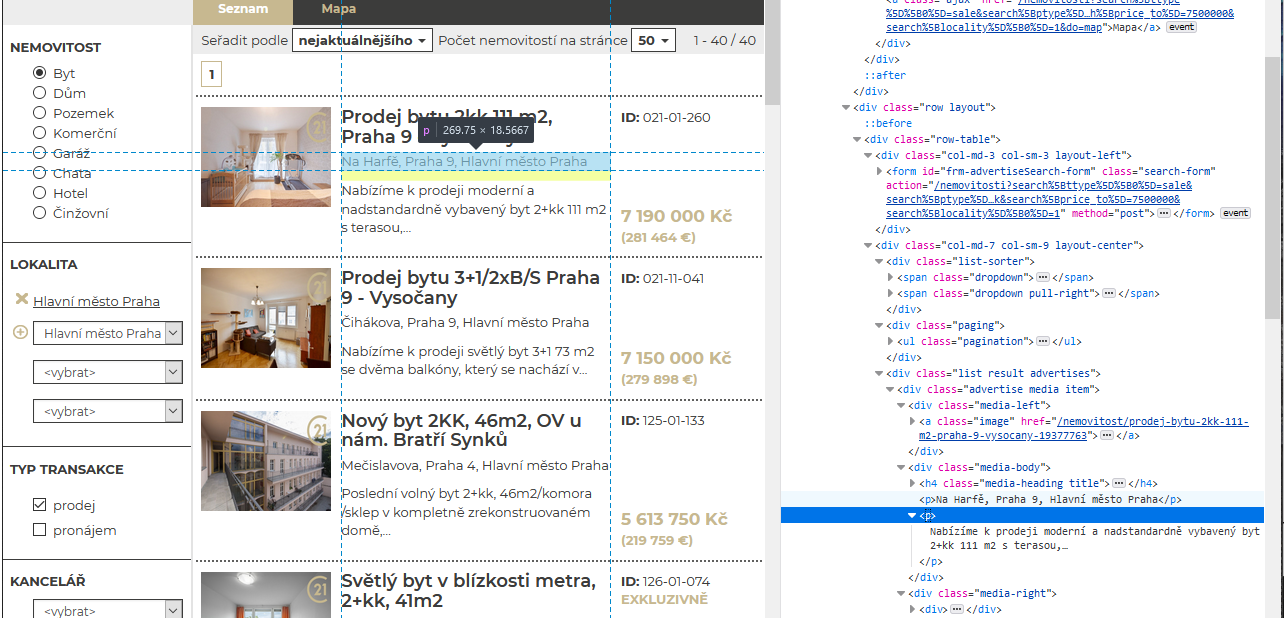

In [30]:
for item in all:
    # If you get "AttributeError: 'NoneType' object has no attribute 'text'", you have to use Try/Except method:
    try:
        print(item.find("span", {"class", "amount"}).text)
        print(item.find("div", {"class", "media-body"}).find("p").text)            # if you have more "minor" tags inside a "major" tag
        print(item.find("div", {"class", "media-body"}).find("h4").find("a").text)
    except:
        print(None)
    
    #print(item.find_all("h4", {"class", "media-heading title"})[0].text)          # if you have more lines of text here
    #print(item.find_all("h4", {"class", "media-heading title"})[1].text)
    
    print(" ")


7 190 000 Kč
Na Harfě, Praha 9, Hlavní město Praha
Prodej bytu 2kk 111 m2, Praha 9 - Vysočany
 
7 150 000 Kč
Čihákova, Praha 9, Hlavní město Praha
Prodej bytu 3+1/2xB/S Praha 9 - Vysočany
 
5 613 750 Kč
Mečislavova, Praha 4, Hlavní město Praha
Nový byt 2KK, 46m2, OV u nám. Bratří Synků
 
4 750 000 Kč
Nedvězská, Praha 10, Hlavní město Praha
Světlý byt v blízkosti metra, 2+kk,  41m2
 
4 990 000 Kč
Českobrodská, Praha 9, Hlavní město Praha
Prodej DV byt 2+1/S, 51 m2 + sklep 7,1 m2 + sklep 1,3 m2, Praha 9 - Běchovice
 
4 650 000 Kč
Buková, Praha 3, Hlavní město Praha
Prodej bytu 2+1, 51 m2, ul. Buková, Praha 3 - Žižkov
 
5 795 000 Kč
Cholupická, Praha 4, Hlavní město Praha
Prodej bytu 3+1+lodžie v krásném klidném prostředí
 
7 140 000 Kč
Skuteckého, Praha 6, Hlavní město Praha
Prodej, bytu 3+kk,T,B, 91m2, Praha - Řepy
 
None
 
5 900 000 Kč
Vsetínská, Praha 5, Hlavní město Praha
Prodej bytu 3+1, 80m2, Praha Zličín
 
4 490 000 Kč
Skuteckého, Praha 6, Hlavní město Praha
Prodej bytu 2+KK po ce

## Extracting Elements with no Unique Identifiers

If we have elements like this (in pink):

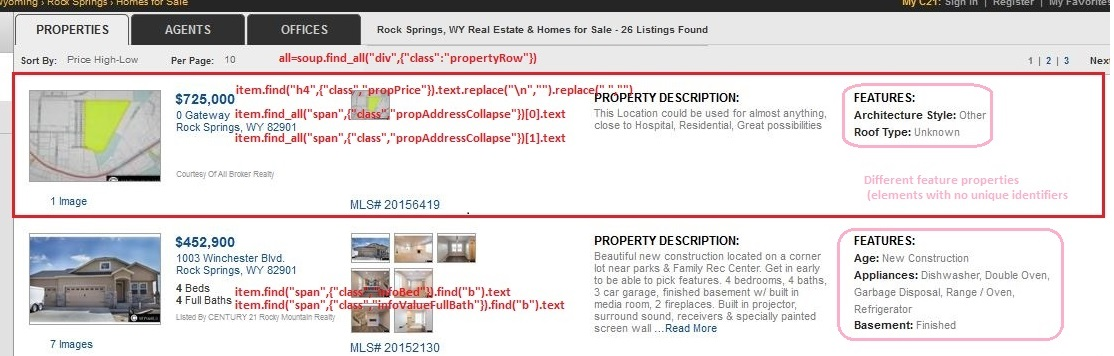

The elements have the same tag and class name, these elements are with no unique identifiers. If we call to this position on the website, it sometimes carying the different information (higlighted in pink). 

We can solve this issue by using the loop inside the loop used (originaly for retreaving elements from "All" data). This for loop will go through each of "columnGroup" divisions. It will access the "featureGroup" element and "featureName" element. 

Next, we need to use python build-in "zip" function for these groups. This function is used to iterate through two lists at the same time. Dont confuse these "feature_group, feature_name" variables with these "featureGroup, featureName" class names.

We can temporaryly print feature_group.text and feature_name.text. In the next step, we can put some conditions to extract only relevant informations. For example add condition if lot size is in the feature_group.text

    for item in all:
       
       --snip--

        for column_group in item.find_all("div", {"class": "columnGroup"}):
            #print(column_group)
            for feature_group, feature_name in zip(column_group.find_all("span", {"class": "featureGroup"}), column_group.find_all("span",      {"class": "featureName"})):
                  #print(feature_group.text, feature_name.text)
                  if "Lot Size" in feature_group.text:
                      print("feature_name.text)
                      

        print(" ")


## Saving the extracted data in CSV file

Lets thing about how we want the tab to look like, how many rows and columns. To create a data frame, the solution would be to iterate through the data, but it is a costly solution. It take a lot of time, so there may be a better solution.

It is probably better to create a data frame from out of python dictionary or a list of dictionaries. So lets add each scraped value into a dictionary and then store the dictionary in a list. So the result will be the list of multiple dictionaries. In this case the list of 40 dictionaries:

In [6]:
l = []
for item in all:
    d = {}

    try:
        d["Cena"] = item.find("span", {"class", "amount"}).text
    except:
        d["Cena"] = None
    
    try:
        d["Adresa"] = item.find("div", {"class", "media-body"}).find("p").text          
    except:
        d["Adresa"] = None  
        
    try:
        d["Popis inzerátu"] = (item.find("div", {"class", "media-body"}).find("h4").find("a").text)
    except:
        d["Popis inzerátu"] = None
    
    l.append(d)

In [7]:
l

[{'Cena': '4 650 000 Kč',
  'Adresa': 'Buková, Praha 3, Hlavní město Praha',
  'Popis inzerátu': 'Prodej bytu 2+1, 51 m2, ul. Buková, Praha 3 - Žižkov'},
 {'Cena': '7 190 000 Kč',
  'Adresa': 'Na Harfě, Praha 9, Hlavní město Praha',
  'Popis inzerátu': 'Prodej bytu 2kk 111 m2, Praha 9 - Vysočany'},
 {'Cena': '7 150 000 Kč',
  'Adresa': 'Čihákova, Praha 9, Hlavní město Praha',
  'Popis inzerátu': 'Prodej bytu 3+1/2xB/S Praha 9 - Vysočany'},
 {'Cena': '5 613 750 Kč',
  'Adresa': 'Mečislavova, Praha 4, Hlavní město Praha',
  'Popis inzerátu': 'Nový byt 2KK, 46m2, OV u nám. Bratří Synků'},
 {'Cena': '4 750 000 Kč',
  'Adresa': 'Nedvězská, Praha 10, Hlavní město Praha',
  'Popis inzerátu': 'Světlý byt v blízkosti metra, 2+kk,  41m2'},
 {'Cena': '4 990 000 Kč',
  'Adresa': 'Českobrodská, Praha 9, Hlavní město Praha',
  'Popis inzerátu': 'Prodej DV byt 2+1/S, 51 m2 + sklep 7,1 m2 + sklep 1,3 m2, Praha 9 - Běchovice'},
 {'Cena': '5 795 000 Kč',
  'Adresa': 'Cholupická, Praha 4, Hlavní město Pr

The last step you have to do, is to import pandas. Create a dataframe and pass list into the dataframe:

In [9]:
import pandas
df = pandas.DataFrame(l)
df

,Cena,Adresa,Popis inzerátu
0,4 650 000 Kč,"Buková, Praha 3, Hlavní město Praha","Prodej bytu 2+1, 51 m2, ul. Buková, Praha 3 - ..."
1,7 190 000 Kč,"Na Harfě, Praha 9, Hlavní město Praha","Prodej bytu 2kk 111 m2, Praha 9 - Vysočany"
2,7 150 000 Kč,"Čihákova, Praha 9, Hlavní město Praha",Prodej bytu 3+1/2xB/S Praha 9 - Vysočany
3,5 613 750 Kč,"Mečislavova, Praha 4, Hlavní město Praha","Nový byt 2KK, 46m2, OV u nám. Bratří Synků"
4,4 750 000 Kč,"Nedvězská, Praha 10, Hlavní město Praha","Světlý byt v blízkosti metra, 2+kk, 41m2"
5,4 990 000 Kč,"Českobrodská, Praha 9, Hlavní město Praha","Prodej DV byt 2+1/S, 51 m2 + sklep 7,1 m2 + sk..."
6,5 795 000 Kč,"Cholupická, Praha 4, Hlavní město Praha",Prodej bytu 3+1+lodžie v krásném klidném prost...
7,7 140 000 Kč,"Skuteckého, Praha 6, Hlavní město Praha","Prodej, bytu 3+kk,T,B, 91m2, Praha - Řepy"
8,None,"Truhlářská, Praha 1, Hlavní město Praha","Prodej, byt 2+kk, 63,5 m2, Praha 1 - Truhlářsk..."
9,5 900 000 Kč,"Vsetínská, Praha 5, Hlavní město Praha","Prodej bytu 3+1, 80m2, Praha Zličín"


To wrap it up. Save dataframe to a CSV:

In [10]:
df.to_csv("inzeraty.csv")

### Crawling through webpages

The logic behind extracting the data from other pages is to load the other pages in python aswell, using the requests again. We can do it manually to through each page, or we can figure out the rule between the pages and there probably be always a rule.When we go through the pages, as you can see there is the minor number change in the URL.

So we can use the first page and then we can loop through the URLs and change this value from 0, to 10, 20... and so on. Lets store a base url (#7). So we have for example 3 pages and each iteration increases by 10:
    
    base_url="http://www.pythonhow.com/real-estate/rock-springs-wy/LCWYROCKSPRINGS/t=0&s="
    
    for page in range(0, 30, 10)
        print(base_url + str(page) +".html")
        
    >>> http://www.pythonhow.com/real-estate/rock-springs-wy/LCWYROCKSPRINGS/t=0&s=
    >>> http://www.pythonhow.com/real-estate/rock-springs-wy/LCWYROCKSPRINGS/t=0&s=
    >>> http://www.pythonhow.com/real-estate/rock-springs-wy/LCWYROCKSPRINGS/t=0&s=

Well now we have verified, that it works, lets modify the idea to our code, by copying this code before the parsing data with BeautifulSoup. If you want to be precise, you dont have to write number of pages manually. Instead go to websites, to your first page and inspect the element of the number of the page.

Now lets grab that page number, call it "page_nr" variable equals to soup which will contain the html code of the first page "r=requests.get("http://www.pythonhow.com/real-estate/rock-springs-wy/LCWYROCKSPRINGS/")" which is modern Ajax request. So its a simple page of the pages(1, 2, 3...). Lets find all elements ("a") with class of "Page". Now we need to grab the last item of the list (which means index [-1] and text). If we print it out, we will now how many pages we have. 

    #Lets take a look how many pages were found
    page_nr=soup.find_all("a",{"class":"Page"})[-1].text
    print(page_nr,"number of pages were found")
    
    >>> 3 number of pages were found
    
So lets grab our page variable (= number of pages) and multiply it by *10, to get numbers 10, 20.. (#7). However as you can see, the class is string:

    print(type(page_nr))
    
    >>> <class "str>
    
To be able to get values you want, you have to convert str(page_nr) into an integer int(page_nr) (#7):


    #Crawling through the webpages (results, pages 1-XX)
    for page in range(0,int(page_nr)*10,10):               #7
        print( )


        #Getting data from cached URL
        r=requests.get(base_url+str(page)+".html")
        c=r.content
        #c=r.json()["list"]


        #Parsing data
        soup=BeautifulSoup(c,"html.parser")
        all=soup.find_all("div",{"class":"propertyRow"})
        
        Use for loop ("big loop") to iterate through the scraped data to get requested elements
        for item in all:
        
            --snip--


## Full code:

In [ ]:
import requests
import pandas
from bs4 import BeautifulSoup as bs

r = requests.get("https://www.century21.cz/nemovitosti?search%5Bttype%5D%5B0%5D=sale&search%5Bptype%5D=flat&search%5Boptions%5D%5Bflat%5D%5Bdisposition%5D%5B0%5D=2%2B1&search%5Boptions%5D%5Bflat%5D%5Bdisposition%5D%5B1%5D=2%2Bkk&search%5Boptions%5D%5Bflat%5D%5Bdisposition%5D%5B2%5D=3%2B1&search%5Boptions%5D%5Bflat%5D%5Bdisposition%5D%5B3%5D=3%2Bkk&search%5Bprice_to%5D=7500000&search%5Blocality%5D%5B0%5D=1")
c = r.content


soup = bs(c, "html.parser")
all = soup.find_all("div", {"class": "advertise media item"})


for item in all:
    try:
        print(item.find("span", {"class", "amount"}).text)
        print(item.find("div", {"class", "media-body"}).find("p").text) 
        print(item.find("div", {"class", "media-body"}).find("h4").find("a").text)
    except:
        print(None)
    
    print(" ")


l = []
for item in all:
    d = {}

    try:
        d["Cena"] = item.find("span", {"class", "amount"}).text
    except:
        d["Cena"] = None
    
    try:
        d["Adresa"] = item.find("div", {"class", "media-body"}).find("p").text          
    except:
        d["Adresa"] = None  
        
    try:
        d["Popis inzerátu"] = (item.find("div", {"class", "media-body"}).find("h4").find("a").text)
    except:
        d["Popis inzerátu"] = None
    
    l.append(d)


df = pandas.DataFrame(l)
df.to_csv("inzeraty.csv")